In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [2]:
fulldata= pd.read_csv('molecule_complete.csv')
fulldata= fulldata.drop(columns=['molecule_name', 'atom_atom1_structure', 'type', 'type_scc', 'atom'])
fulldata.columns

Index(['atom_index_0', 'atom_index_1', 'scalar_coupling_constant',
       'potential_energy', 'X', 'Y', 'Z', 'XX_atom1', 'YX_atom1', 'ZX_atom1',
       'XY_atom1', 'YY_atom1', 'ZY_atom1', 'XZ_atom1', 'YZ_atom1', 'ZZ_atom1',
       'XX', 'YX', 'ZX', 'XY', 'YY', 'ZY', 'XZ', 'YZ', 'ZZ',
       'mulliken_charge_atom1', 'mulliken_charge', 'fc', 'sd', 'pso', 'dso',
       'x_atom1_structure', 'y_atom1_structure', 'z_atom1_structure', 'x', 'y',
       'z'],
      dtype='object')

In [3]:
#fulldata.to_csv('NoCatDataSet.csv', index=False)

In [4]:
fulldata

,atom_index_0,atom_index_1,scalar_coupling_constant,potential_energy,X,Y,Z,XX_atom1,YX_atom1,ZX_atom1,...,fc,sd,pso,dso,x_atom1_structure,y_atom1_structure,z_atom1_structure,x,y,z
0,1,0,84.807600,-40.52368,0.0000,0.0000,0.0000,31.3410,-1.2317,4.0544,...,83.022400,0.254579,1.258620,0.272010,0.002150,-0.006031,0.001976,-0.012698,1.085804,0.008001
1,1,2,-11.257000,-40.52368,0.0000,0.0000,0.0000,31.3410,-1.2317,4.0544,...,-11.034700,0.352978,2.858390,-3.433600,0.002150,-0.006031,0.001976,1.011731,1.463751,0.000277
2,1,3,-11.254800,-40.52368,0.0000,0.0000,0.0000,31.3410,-1.2317,4.0544,...,-11.032500,0.352944,2.858520,-3.433870,0.002150,-0.006031,0.001976,-0.540815,1.447527,-0.876644
3,1,4,-11.254300,-40.52368,0.0000,0.0000,0.0000,31.3410,-1.2317,4.0544,...,-11.031900,0.352934,2.858550,-3.433930,0.002150,-0.006031,0.001976,-0.523814,1.437933,0.906397
4,2,0,84.807400,-40.52368,0.0000,0.0000,0.0000,31.5814,1.2173,-4.1474,...,83.022200,0.254585,1.258610,0.272013,1.011731,1.463751,0.000277,-0.012698,1.085804,0.008001
5,2,3,-11.254100,-40.52368,0.0000,0.0000,0.0000,31.5814,1.2173,-4.1474,...,-11.031700,0.352932,2.858560,-3.433950,1.011731,1.463751,0.000277,-0.540815,1.447527,-0.876644
6,2,4,-11.254800,-40.52368,0.0000,0.0000,0.0000,31.5814,1.2173,-4.1474,...,-11.032400,0.352943,2.858530,-3.433870,1.011731,1.463751,0.000277,-0.523814,1.437933,0.906397
7,3,0,84.809300,-40.52368,0.0000,0.0000,0.0000,31.5172,4.1086,1.2723,...,83.024100,0.254634,1.258560,0.272012,-0.540815,1.447527,-0.876644,-0.012698,1.085804,0.008001
8,3,4,-11.254300,-40.52368,0.0000,0.0000,0.0000,31.5172,4.1086,1.2723,...,-11.031900,0.352943,2.858560,-3.433930,-0.540815,1.447527,-0.876644,-0.523814,1.437933,0.906397
9,4,0,84.809500,-40.52368,0.0000,0.0000,0.0000,31.4029,-4.0942,-1.1793,...,83.024300,0.254628,1.258560,0.272012,-0.523814,1.437933,0.906397,-0.012698,1.085804,0.008001


In [5]:
sample= fulldata.sample(frac=0.3, random_state=1, replace=True)
sample

,atom_index_0,atom_index_1,scalar_coupling_constant,potential_energy,X,Y,Z,XX_atom1,YX_atom1,ZX_atom1,...,fc,sd,pso,dso,x_atom1_structure,y_atom1_structure,z_atom1_structure,x,y,z
4322341,16,4,0.077299,-440.4596,-0.6248,0.5624,0.8068,25.9083,-0.5672,-0.6964,...,0.246801,-0.041499,-0.027993,-0.100010,1.936086,-2.891268,-0.988008,-1.137796,-2.672282,-1.648026
3937352,13,6,2.829150,-403.2739,-2.5814,-0.3160,0.4906,27.3164,5.1626,2.0783,...,2.959300,-0.025151,0.251100,-0.356105,-1.628121,-2.440402,-1.172413,-2.585373,-1.363099,1.862308
491263,11,5,6.262650,-401.0668,-1.4726,-0.5167,1.1734,33.2326,0.7972,-3.5126,...,6.138260,0.020713,-0.060442,0.164120,-0.098320,-0.457306,-0.704858,0.793551,-1.883668,1.575690
4267653,14,0,2.108180,-367.4244,0.3128,-4.1323,0.8236,33.7433,-0.1789,0.1003,...,2.113720,-0.033553,-0.035942,0.063950,0.746029,-0.027162,-2.062367,-0.152529,1.585481,0.011453
1166159,15,5,-1.257380,-366.1838,-0.9027,-0.6058,-1.4183,33.6614,1.4954,2.0998,...,-1.434080,0.155594,0.002281,0.018827,3.984024,-1.457500,1.892063,1.956032,-1.559842,1.096783
2326672,13,5,3.582800,-437.9013,-2.0600,-1.0295,0.3712,27.7516,1.6214,0.8838,...,3.507460,0.058849,0.089288,-0.072799,1.422451,-1.091473,1.618080,-0.865778,-1.008545,1.719358
413825,16,3,2.851850,-386.3286,-1.0336,-0.1894,0.2639,31.5653,-3.3555,-2.6961,...,3.029320,-0.019645,0.179372,-0.337193,0.671394,-0.934612,4.260191,0.664517,-0.577400,1.212433
3063756,11,12,3.390410,-424.4054,1.0433,-1.5417,2.0780,37.4917,-2.5025,-0.9602,...,3.258970,0.083384,0.110329,-0.062276,-1.240481,1.468404,1.049292,-0.777737,-0.724795,-0.004415
1215878,17,2,6.081650,-387.2473,0.5445,-1.1318,0.5477,30.2986,3.0621,-2.7115,...,6.153660,0.014845,0.223431,-0.310290,0.309637,-2.836832,-2.042333,0.127703,-0.019652,-0.028415
2610452,10,11,-11.758900,-439.1625,-1.8700,1.8589,0.2158,30.7157,1.1244,3.3343,...,-11.987100,0.349451,1.999940,-2.121170,-0.792558,1.888002,-0.746043,-0.543101,1.904412,1.007748


In [6]:
features= sample.drop(['scalar_coupling_constant'], axis=1)
target= sample[['scalar_coupling_constant']]

In [7]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [8]:
linear= LinearRegression()
mse= cross_val_score(linear, features, target, scoring='neg_mean_squared_error', cv= 20)
mean_mse= np.mean(mse)
print(mean_mse)

-6.688451154816718e-09


In [20]:
ridge= Ridge()
parameters={'alpha': [1e-10, 1e-5, 1e-2, 1, 10, 50, 100, 500, 1000]}
ridgereg= GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv= 15)
ridgereg.fit(features, target)
print('ridge param: ', ridgereg.best_params_)
print('ridge score: ', ridgereg.best_score_)
ridgereg

ridge param:  {'alpha': 1e-10}
ridge score:  -6.68848816194066e-09


GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 1, 10, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [19]:
lasso= Lasso()
parameters={'alpha': [1e-10, 1e-5, 1e-2, 1, 10, 50, 100, 500, 1000]}
lassoreg= GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv= 20)
lassoreg.fit(features, target)
print('lasso param: ', lassoreg.best_params_)
print('lasso score: ', lassoreg.best_score_)

lasso param:  {'alpha': 1e-10}
lasso score:  -2.7915529327126588e-08


In [22]:
f_train, f_test, t_train, t_test= train_test_split(features, target, test_size=.1, random_state=4)

In [23]:
print('total feature training features: ', len(f_train))
print('total feature testing features: ', len(f_test))
print('total target training features: ', len(t_train))
print('total target testing features: ', len(t_test))

total feature training features:  1257699
total feature testing features:  139745
total target training features:  1257699
total target testing features:  139745


In [24]:
print('feature train shape: ', f_train.shape)
print('target train shape: ', t_train.shape)

feature train shape:  (1257699, 36)
target train shape:  (1257699, 1)


In [25]:
mse1= cross_val_score(linear, f_train, t_train, scoring='neg_mean_squared_error', cv= 20)
mean_mse1= np.mean(mse1)
print(mean_mse1)

-6.653948818557585e-09


In [26]:
ridgereg1= GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv= 20)
ridgereg1.fit(f_train, t_train)
print('ridge1 param: ', ridgereg1.best_params_)
print('ridge1 score: ', ridgereg1.best_score_)

ridge1 param:  {'alpha': 1e-10}
ridge1 score:  -6.653948884038345e-09


In [27]:
lassoreg1= GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv= 20)
lassoreg1.fit(f_train, t_train)
print('lasso1 param: ', lassoreg1.best_params_)
print('lasso1 score: ', lassoreg1.best_score_)

lasso1 param:  {'alpha': 1e-10}
lasso1 score:  -2.7341898368268053e-08


In [28]:
ridgereg1.score(f_test, t_test)

-6.999984303139355e-09

In [29]:
ridgepredict=ridgereg1.predict(f_test)

In [30]:
actualtest=np.array(t_test)

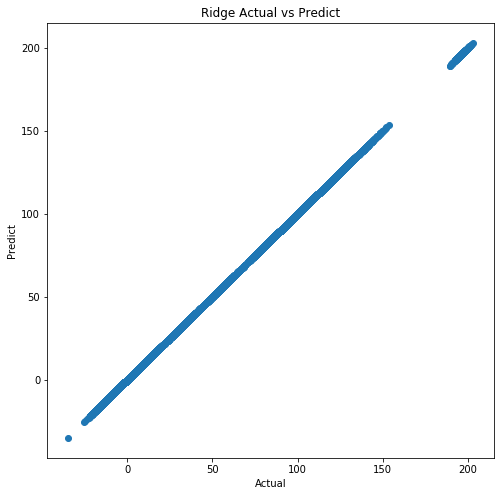

In [33]:
plt.rcParams["figure.figsize"] = (8, 8)
fig, ax = plt.subplots()
ax.scatter(actualtest, ridgepredict)
ax.set(title="Ridge Actual vs Predict")
ax.set(xlabel="Actual", ylabel="Predict");


In [44]:
lassoreg1.score(f_test, t_test)

-2.7362553579111653e-08

In [34]:
lassopredict=lassoreg1.predict(f_test)
lassopredict

array([  1.81762204, -10.64766058,   7.70752607, ...,   1.40307282,
         4.27411517,  -1.58683058])

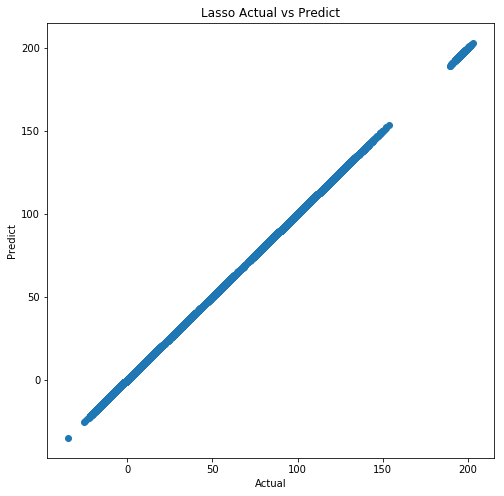

In [35]:
plt.rcParams["figure.figsize"] = (8, 8)
fig, ax = plt.subplots()
ax.scatter(actualtest, lassopredict)
ax.set(title="Lasso Actual vs Predict")
ax.set(xlabel="Actual", ylabel="Predict");

In [38]:
linear.fit(f_train, t_train)
linpredict= linear.predict(f_test)

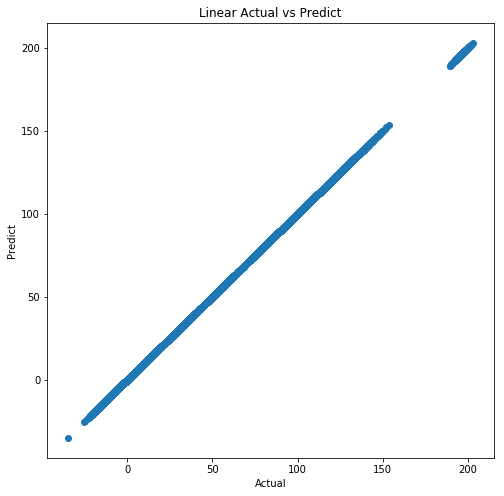

In [39]:
plt.rcParams["figure.figsize"] = (8, 8)
fig, ax = plt.subplots()
ax.scatter(actualtest, linpredict)
ax.set(title="Linear Actual vs Predict")
ax.set(xlabel="Actual", ylabel="Predict");